In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


def normalize(img):
    return (img - np.min(img.flatten())) / (
        np.max(img.flatten()) - np.min(img.flatten())
    )

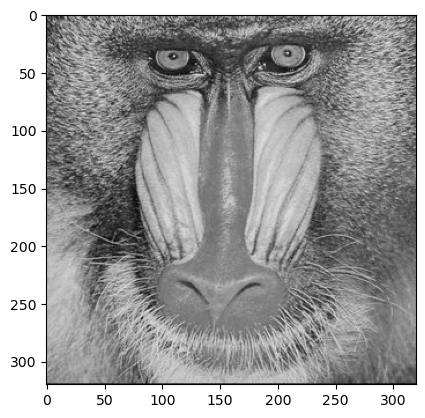

In [13]:
path_ = "files/baboon.jpeg"

img = cv2.imread(path_, cv2.IMREAD_GRAYSCALE)

# Displaying the image
plt.imshow(img, cmap="gray")

In [ ]:
figure = plt.figure(figsize=(12, 12))


filters = []
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

prewitt_y = -prewitt_x.T

filters.append({"name": "prewitt", "filter_x": prewitt_x, "filter_y": prewitt_y})

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

sobel_y = -sobel_x.T

filters.append({"name": "sobel", "filter_x": sobel_x, "filter_y": sobel_y})


roberts_x = np.array([[0, 1], [-1, 0]])

roberts_y = np.array([[1, 0], [0, -1]])
filters.append({"name": "roberts", "filter_x": roberts_x, "filter_y": roberts_y})

for filter_ in filters:
    img_x = cv2.filter2D(img, -1, filter_["filter_x"])
    img_y = cv2.filter2D(img, -1, filter_["filter_y"])
    print(filter_["name"])
    figure = plt.figure(figsize=(12, 12))
    plt.subplot(1, 2, 1)
    plt.imshow(img_x, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(img_y, cmap="gray")
    plt.show()

In [ ]:
figure = plt.figure(figsize=(6, 6))
img_x = cv2.filter2D(img, -1, sobel_x)
img_y = cv2.filter2D(img, -1, sobel_y)
img_grad = np.sqrt(img_x**2 + img_y**2)
plt.imshow(normalize(img_grad), cmap="gray")

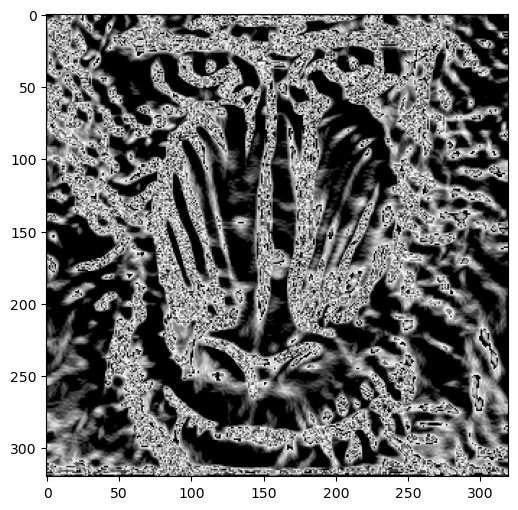

In [75]:
figure = plt.figure(figsize=(6, 6))
blurred_img = gaussian_filter(img, sigma=3)
img_x = cv2.filter2D(blurred_img, -1, sobel_x)
img_y = cv2.filter2D(blurred_img, -1, sobel_y)
img_grad = np.sqrt(img_x**2 + img_y**2)
plt.imshow(normalize(img_grad), cmap="gray")

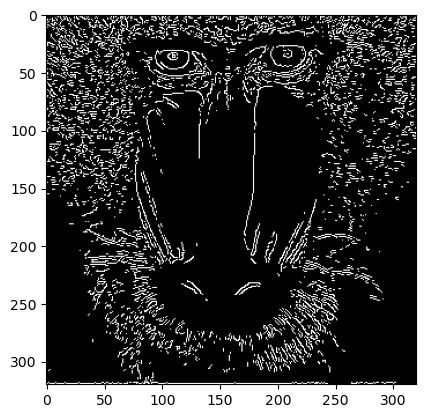

In [78]:
edges = cv2.Canny(img, 250, 300)
plt.imshow(edges, cmap="gray")